In [6]:
import Pkg; Pkg.add(["HypertextLiteral","ScientificTypes","StatsPlots"])

   Resolving package versions...
    Updating `~/.julia/environments/v1.7/Project.toml`
  [f3b207a7] + StatsPlots v0.14.34
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [7d9fca2a] + Arpack v0.5.3
  [13072b0f] + AxisAlgorithms v1.0.1
  [aaaa29a8] + Clustering v0.14.2
  [e7dc6d0d] + DataValues v0.4.13
  [a98d9a8b] + Interpolations v0.13.6
  [5ab0869b] + KernelDensity v0.6.3
  [6f286f6a] + MultivariateStats v0.9.0
  [b8a86587] + NearestNeighbors v0.4.11
  [510215fc] + Observables v0.5.1
  [c84ed2f1] + Ratios v0.4.3
  [f3b207a7] + StatsPlots v0.14.34
  [ab02a1b2] + TableOperations v1.2.0
  [cc8bc4a8] + Widgets v0.6.6
  [efce3f68] + WoodburyMatrices v0.5.5
  [68821587] + Arpack_jll v3.5.1+1


In [7]:
begin
	using CategoricalArrays, CSV
	using DataFrames, DataFramesMeta, Dates
	using Glob
	using HypertextLiteral
	using JSON3
	using Plots, PlutoUI
	using ScientificTypes, StatsBase, StatsPlots
	using Test
end

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1423


In [8]:
pwd()


"/Volumes/Pomona-1/Secretary_Island"

In [52]:
begin
	csv_files = glob("*/*.csv")
	K = DataFrame.(CSV.File.(csv_files))
	K_aggregate = reduce(vcat, K)
	K_species = groupby(K_aggregate, :species)
	K_base = K_species[(species="K-Set",)]
end

,Location,File_Name,start,end,min_freq,max_freq,certainty
,String15,String31,Time,Time,Float64,Float64,Int64
1,Crossroad,010320_220001.wav.data,22:09:02,22:09:26,1541.0,3938.0,100
2,Crossroad,010320_221502.wav.data,22:22:39,22:23:02,1854.0,3996.0,100
3,Crossroad,010320_221502.wav.data,22:23:10,22:23:36,1133.0,2178.0,100
4,Crossroad,010320_224502.wav.data,22:53:04,22:53:08,1905.0,3075.0,100
5,Crossroad,010320_224502.wav.data,22:53:34,22:54:03,1619.0,2664.0,100
6,Crossroad,010320_224502.wav.data,22:54:54,22:55:20,1656.0,3871.0,100
7,Crossroad,010320_230002.wav.data,23:08:16,23:08:39,1228.0,2919.0,100
8,Crossroad,010420_231502.wav.data,23:21:26,23:21:51,1681.0,3087.0,100
9,Crossroad,010420_231502.wav.data,23:25:20,23:25:47,1622.0,3996.0,100


In [53]:
#work out min and max call length
begin
	o=@transform(K_base, @byrow :Length = Dates.Second(:end - :start) >= Dates.Second(0) ? Dates.Second(:end - :start) : Dates.Second(86400) + Dates.Second(:end - :start))
	describe(o)
end

,variable,mean,min,median,max
,Symbol,Union…,Any,Any,Any
1,Location,,Crossroad,,North_R
2,File_Name,,010320_220001.wav.data,,310320_224502.wav.data
3,start,,22:00:01,23:00:03,23:59:54
4,end,,00:00:02,23:00:05,23:59:58
5,min_freq,1556.3,0.0,1622.0,2826.0
6,max_freq,3077.46,1332.0,3050.0,4000.0
7,certainty,100.0,100,100.0,100
8,call_type,,M,,M
9,species,,K-Set,,K-Set


In [54]:
begin
	# Add Date column.
	K_mod = @transform(K_base, @byrow :Date = Date(("20" * :File_Name[5:6] * "-" * :File_Name[3:4] * "-" * :File_Name[1:2]), "yyyy-mm-dd"))

	# Add count column, probably not the best way to do this.
	# Individual calls in a duet are often correctly detected and counted as one each, though some duets do slip through.
	#insertcols!(K_mod, 14, "count" => ones(nrow(K_mod)))

	
	# Add column containing tuple of Recording_Period_Start, Recording_Period_End
	# Used later to correct for zero days.
	#@transform!(K_mod, @byrow :Recording_Period = :Recording_Period_Start, :Recording_Period_End )

	# Add Nights_In_Recording_Period colum.
	#@transform!(K_mod, :Nights_In_Recording_Period = Dates.value.(Date.(:Recording_Period_End) - Date.(:Recording_Period_Start)))

	# Coerce types, Location to categorical array mainly.
	coerce!(K_mod, :Location=>Multiclass, :call_type=>Multiclass ) #, :count=>Count
	
end

,Location,File_Name,start,end,min_freq,max_freq,certainty
,Cat…,String31,Time,Time,Float64,Float64,Int64
1,Crossroad,010320_220001.wav.data,22:09:02,22:09:26,1541.0,3938.0,100
2,Crossroad,010320_221502.wav.data,22:22:39,22:23:02,1854.0,3996.0,100
3,Crossroad,010320_221502.wav.data,22:23:10,22:23:36,1133.0,2178.0,100
4,Crossroad,010320_224502.wav.data,22:53:04,22:53:08,1905.0,3075.0,100
5,Crossroad,010320_224502.wav.data,22:53:34,22:54:03,1619.0,2664.0,100
6,Crossroad,010320_224502.wav.data,22:54:54,22:55:20,1656.0,3871.0,100
7,Crossroad,010320_230002.wav.data,23:08:16,23:08:39,1228.0,2919.0,100
8,Crossroad,010420_231502.wav.data,23:21:26,23:21:51,1681.0,3087.0,100
9,Crossroad,010420_231502.wav.data,23:25:20,23:25:47,1622.0,3996.0,100


In [55]:
describe(K_mod)

,variable,mean,min,median,max
,Symbol,Union…,Any,Any,Any
1,Location,,Crossroad,,North_R
2,File_Name,,010320_220001.wav.data,,310320_224502.wav.data
3,start,,22:00:01,23:00:03,23:59:54
4,end,,00:00:02,23:00:05,23:59:58
5,min_freq,1556.3,0.0,1622.0,2826.0
6,max_freq,3077.46,1332.0,3050.0,4000.0
7,certainty,100.0,100,100.0,100
8,call_type,,M,,M
9,species,,K-Set,,K-Set


In [56]:
levels(K_mod.Location)

5-element Vector{String15}:
 "Crossroad"
 "Grono"
 "Lake_Sec"
 "Marley"
 "North_R"

In [57]:
Location_Groups = groupby(K_mod, :Location)

,Location,File_Name,start,end,min_freq,max_freq,certainty
,Cat…,String31,Time,Time,Float64,Float64,Int64
1,Crossroad,010320_220001.wav.data,22:09:02,22:09:26,1541.0,3938.0,100
2,Crossroad,010320_221502.wav.data,22:22:39,22:23:02,1854.0,3996.0,100
3,Crossroad,010320_221502.wav.data,22:23:10,22:23:36,1133.0,2178.0,100
4,Crossroad,010320_224502.wav.data,22:53:04,22:53:08,1905.0,3075.0,100
5,Crossroad,010320_224502.wav.data,22:53:34,22:54:03,1619.0,2664.0,100
6,Crossroad,010320_224502.wav.data,22:54:54,22:55:20,1656.0,3871.0,100
7,Crossroad,010320_230002.wav.data,23:08:16,23:08:39,1228.0,2919.0,100
8,Crossroad,010420_231502.wav.data,23:21:26,23:21:51,1681.0,3087.0,100
9,Crossroad,010420_231502.wav.data,23:25:20,23:25:47,1622.0,3996.0,100


In [36]:
function calls_at_location(trap_number)
    l = Location_Groups[(Location=trap_number,)]
    string(trap_number, ": ", nrow(l))
end

calls_at_location (generic function with 1 method)

In [58]:
# Calls detected at each location to date.

begin
	println("Calls detected at each location to date.\n")
	for i = levels(K_mod.Location)
		println(calls_at_location(i))
	end
	println("\nTotal: ", nrow(K_mod))
end

Calls detected at each location to date.

Crossroad: 390
Grono: 375
Lake_Sec: 315
Marley: 98
North_R: 6

Total: 1184


In [38]:
begin
	# Duets

	K_duet = K_species[(species="Duet",)]
	duets_by_location = groupby(K_duet, :Location)
	println("Duets detected at each location to date.\n")
	for i = levels(K_duet.Location)
		println(i, ":\t", nrow(duets_by_location[(Location=i,)]))
	end
	println("\nTotal:\t", nrow(K_duet))
	#println("Duets recorded at: C05, M05, N14, WD07")
end

Duets detected at each location to date.

Crossroad:	48
Grono:	69
Lake_Sec:	19
Marley:	13

Total:	149


In [59]:
begin
	# Female

	K_female = K_species[(species="K-F",)]
	female_by_location = groupby(K_female, :Location)
	println("Female Tokoeka detections at each location to date.\n")
	for i = levels(K_female.Location)
		println(i, ":\t", nrow(female_by_location[(Location=i,)]))
	end
	println("\nTotal:\t", nrow(K_female))
end

Female Tokoeka detections at each location to date.

Crossroad:	63
Grono:	77
Lake_Sec:	18
Marley:	14

Total:	172


In [40]:
begin
	# Male

	K_male = K_species[(species="K-M",)]
	male_by_location = groupby(K_male, :Location)
	println("Male Tokoeka detections at each location to date.\n")
	for i = levels(K_male.Location)
		println(i, ":\t", nrow(male_by_location[(Location=i,)]))
	end
	println("\nTotal:\t", nrow(K_male))
end

Male Tokoeka detections at each location to date.

Crossroad:	322
Grono:	281
Lake_Sec:	291
Marley:	85
North_R:	6

Total:	985


In [60]:
begin
	#M, F, MF, ?
	
	K_m = K_species[(species="K-M",)]
	K_f = K_species[(species="K-F",)]
	K_mf = K_species[(species="K-MF",)]
	K_qmf = K_species[(species="K-?MF",)]

	println("Sex of Tokoeka Calling\n", "======================\n")
	println("Female:\t\t", nrow(K_f), " calls")
	println("Male:\t\t", nrow(K_m), " calls")
	println("Mixed:\t\t", nrow(K_mf), " calls")
	println("Unknown:\t", nrow(K_qmf), " calls")
	println("\nThese are carefully hand annotated.\nWind and distance sometimes makes calls unrecognisable.")
end

Sex of Tokoeka Calling

Female:		172 calls
Male:		985 calls
Mixed:		31 calls
Unknown:	2 calls

These are carefully hand annotated.
Wind and distance sometimes makes calls unrecognisable.


In [42]:
begin
	#Close, Ok, Far
	
	K_close = K_species[(species="K-Close",)]
	K_ok = K_species[(species="K-Ok",)]
	K_far = K_species[(species="K-Far",)]

	println("Distance\n", "========\n")
	println("Close:\t\t", nrow(K_close), " calls")
	println("Ok:\t\t\t", nrow(K_ok), " calls")
	println("Distant:\t", nrow(K_far), " calls")

	print("\nClose Calls have been recorded at: \n")
	print.("- ", levels(K_close.Location), "\n")
end

Distance

Close:		8 calls
Ok:			788 calls
Distant:	389 calls

Close Calls have been recorded at: 
- Crossroad
- Grono


2-element Vector{Nothing}:
 nothing
 nothing

In [61]:
begin
	#Noise Level, Noise Source
	
	K_nl = groupby(K_base, :Noise_Level)
	
	K_low = K_nl[(Noise_Level="Low",)]
	K_med = K_nl[(Noise_Level="Medium",)]
	K_high = K_nl[(Noise_Level="High",)]
	K_terrible = K_nl[(Noise_Level="Terrible",)]

	println("Noise Levels\n", "============\n")
	println("Low:\t\t", nrow(K_low), " calls")
	println("Medium:\t\t", nrow(K_med), " calls")
	println("High:\t\t", nrow(K_high), " calls")
	println("Terrible:\t", nrow(K_terrible), " calls")
	println("\nWind is the main problem.")
end

Noise Levels

Low:		346 calls
Medium:		595 calls
High:		203 calls
Terrible:	40 calls

Wind is the main problem.


In [62]:
begin
    insertcols!(K_mod, 13, "count" => ones(nrow(K_mod)))
	Aggregate_data_by_day = groupby(K_mod, :Date)
	Aggregate_count = DataFrames.combine(Aggregate_data_by_day, :count => sum)
	h = Aggregate_count[!,:count_sum]
end

143-element Vector{Float64}:
  7.0
  2.0
 13.0
  1.0
 23.0
  4.0
 16.0
  1.0
 21.0
  2.0
  6.0
  4.0
 15.0
  ⋮
  1.0
  4.0
  8.0
  2.0
  2.0
  1.0
  2.0
 18.0
  1.0
  6.0
  1.0
  1.0

In [63]:
begin
	Aggregate_data_by_day = groupby(K_mod, :Date)
	Aggregate_count = DataFrames.combine(Aggregate_data_by_day, :count => sum)
	h = Aggregate_count[!,:count_sum]
end

143-element Vector{Float64}:
  7.0
  2.0
 13.0
  1.0
 23.0
  4.0
 16.0
  1.0
 21.0
  2.0
  6.0
  4.0
 15.0
  ⋮
  1.0
  4.0
  8.0
  2.0
  2.0
  1.0
  2.0
 18.0
  1.0
  6.0
  1.0
  1.0

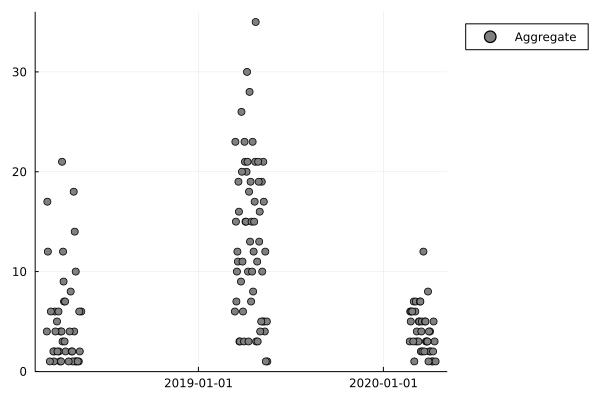

In [64]:
@df Aggregate_count scatter(:Date, :count_sum, label="Aggregate", color=:gray, legend=:outertopright)

In [65]:
describe(Aggregate_count)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,Date,,2018-03-08,2019-04-13,2020-04-13,0,Date
2,count_sum,8.27972,1.0,6.0,35.0,0,Float64


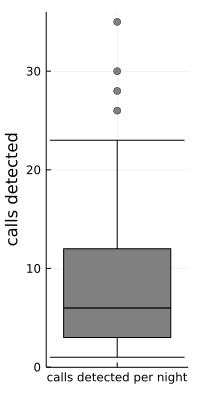

In [66]:
# For all moths.

boxplot(["calls detected per night"],h,legend=false,size=(200,400),whisker_width=1,ylabel="calls detected",color=:grey)